In [86]:
from urllib.request import urlretrieve
from urllib.parse import quote_plus
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import os
import requests
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.initializers import he_uniform, he_normal
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 
from torchvision import transforms,datasets
import sys
%matplotlib inline
%config InlineBackend.figure_format='retina'
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
print(device)
print('done')

cuda
done


### data 크롤링하기
---
피카츄, 파이리, 꼬북이 , 이상해씨 사진 이미지 크롤링

In [87]:

import time
character=['피카츄','이상해씨','파이리','꼬북이']
header={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'}
for i in range(2,4):
    poke=character[i]
    driver=webdriver.Chrome(executable_path=r'C:/Users/songbae/Downloads/chromedriver_win32/chromedriver.exe')
    driver.get(f'https://www.google.com/search?q={quote_plus(poke)}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwif-dSp_rDsAhUEIIgKHbLYBMUQ_AUoAXoECB0QAw&cshid=1602572116372709&biw=1536&bih=754&dpr=1.25')
    time.sleep(5)
    html=driver.page_source
    soup=BS(html)
    i_list=list()
    img=soup.select('img')
    if not os.path.isdir(pokemon_path):
        os.makedirs(pokemon_path)
    for i in img:
        try:
            i_list.append(i.attrs['src'])
        except:
            i_list.append(i.attrs['data-src'])
    print('download')
    for idx in range(len(i_list)):
        if idx==len(i_list)-1:
            break
        urlretrieve(i_list[idx],f'./data/{poke}/'+poke+str(idx)+'.jpg')
    driver.close()
    time.sleep(5)
print('done')

KeyboardInterrupt: 

### 이미지 뻥튀기 시키기 
---
- data augumentation 하기
    

In [88]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
cnt=1
pokemon=dict()
for name in character:
    for idx in range(1,100):
        if os.path.isfile(f'./data/{name}/{name}{idx}.jpg')==False:
            continue
        image=np.array(Image.open(f'./data/{name}/{name}{idx}.jpg'))
        pokemon[f'./data/{name}/{name}{idx}.jpg']=name
print(pokemon.items())
print(len(pokemon))


dict_items([('./data/피카츄/피카츄2.jpg', '피카츄'), ('./data/피카츄/피카츄4.jpg', '피카츄'), ('./data/피카츄/피카츄7.jpg', '피카츄'), ('./data/피카츄/피카츄8.jpg', '피카츄'), ('./data/피카츄/피카츄9.jpg', '피카츄'), ('./data/피카츄/피카츄12.jpg', '피카츄'), ('./data/피카츄/피카츄13.jpg', '피카츄'), ('./data/피카츄/피카츄19.jpg', '피카츄'), ('./data/피카츄/피카츄21.jpg', '피카츄'), ('./data/피카츄/피카츄24.jpg', '피카츄'), ('./data/피카츄/피카츄39.jpg', '피카츄'), ('./data/피카츄/피카츄46.jpg', '피카츄'), ('./data/피카츄/피카츄47.jpg', '피카츄'), ('./data/피카츄/피카츄49.jpg', '피카츄'), ('./data/피카츄/피카츄50.jpg', '피카츄'), ('./data/피카츄/피카츄51.jpg', '피카츄'), ('./data/피카츄/피카츄52.jpg', '피카츄'), ('./data/피카츄/피카츄53.jpg', '피카츄'), ('./data/피카츄/피카츄54.jpg', '피카츄'), ('./data/피카츄/피카츄55.jpg', '피카츄'), ('./data/피카츄/피카츄56.jpg', '피카츄'), ('./data/피카츄/피카츄60.jpg', '피카츄'), ('./data/피카츄/피카츄61.jpg', '피카츄'), ('./data/피카츄/피카츄62.jpg', '피카츄'), ('./data/피카츄/피카츄63.jpg', '피카츄'), ('./data/피카츄/피카츄64.jpg', '피카츄'), ('./data/피카츄/피카츄65.jpg', '피카츄'), ('./data/피카츄/피카츄66.jpg', '피카츄'), ('./data/피카츄/피카츄68.jpg', '피카츄'), ('./data/피카츄/피카츄69.jpg', '피카츄'), ('.

In [129]:
import pandas as pd
df=pd.DataFrame()
mon=list()
photo=list()
for mo, photos in pokemon.items():
    mon+=[photos]
    photo+=[mo]
temp=pd.DataFrame(photo,columns=['path'])
temp1=pd.DataFrame(mon,columns=['label'])
df=pd.concat([temp,temp1],axis=1)
df
    # temp['label']=f'{photos}'
    # df=pd.concat([df,temp])

,path,label
0,./data/피카츄/피카츄2.jpg,피카츄
1,./data/피카츄/피카츄4.jpg,피카츄
2,./data/피카츄/피카츄7.jpg,피카츄
3,./data/피카츄/피카츄8.jpg,피카츄
4,./data/피카츄/피카츄9.jpg,피카츄
...,...,...
227,./data/꼬북이/꼬북이56.jpg,꼬북이
228,./data/꼬북이/꼬북이57.jpg,꼬북이
229,./data/꼬북이/꼬북이59.jpg,꼬북이
230,./data/꼬북이/꼬북이60.jpg,꼬북이


In [130]:
name=df['label'].unique().tolist()
print(name)
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
print(df)

['피카츄', '이상해씨', '파이리', '꼬북이']
                     path  label
0     ./data/피카츄/피카츄2.jpg      3
1     ./data/피카츄/피카츄4.jpg      3
2     ./data/피카츄/피카츄7.jpg      3
3     ./data/피카츄/피카츄8.jpg      3
4     ./data/피카츄/피카츄9.jpg      3
..                    ...    ...
227  ./data/꼬북이/꼬북이56.jpg      0
228  ./data/꼬북이/꼬북이57.jpg      0
229  ./data/꼬북이/꼬북이59.jpg      0
230  ./data/꼬북이/꼬북이60.jpg      0
231  ./data/꼬북이/꼬북이61.jpg      0

[232 rows x 2 columns]


In [114]:
train,test = train_test_split(df,test_size=0.2,stratify=df['label'])
print(train.shape,test.shape)
print(train)
train,valid = train_test_split(train,test_size=0.2,stratify=train['label'])
print(train.shape,valid.shape)

(185, 2) (47, 2)
                       path  label
197    ./data/꼬북이/꼬북이20.jpg      0
60   ./data/이상해씨/이상해씨10.jpg      1
44     ./data/피카츄/피카츄85.jpg      3
80   ./data/이상해씨/이상해씨32.jpg      1
43     ./data/피카츄/피카츄84.jpg      3
..                      ...    ...
212    ./data/꼬북이/꼬북이38.jpg      0
166    ./data/파이리/파이리60.jpg      2
188    ./data/꼬북이/꼬북이11.jpg      0
63   ./data/이상해씨/이상해씨13.jpg      1
55    ./data/이상해씨/이상해씨1.jpg      1

[185 rows x 2 columns]
(148, 2) (37, 2)


In [119]:
train_aggre=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
valid_aggre=ImageDataGenerator()
test_aggre=ImageDataGenerator()
print('done')

done


In [120]:
train_generator=train_aggre.flow_from_dataframe(
    train,
    x_col='path',
    y_col='label',
    target_size=(200,200),
    batch_size=8,
    random_state=9,
    class_mode='raw'
)

valid_generator=valid_aggre.flow_from_dataframe(
    valid,
    x_col='path',
    y_col='label',
    target_size=(200,200),
    batch_size=8,
    random_state=9,
    class_mode='raw'
)

test_generator=test_aggre.flow_from_dataframe(
    test,
    x_col='path',
    y_col='label',
    target_size=(200,200),
    batch_size=8,
    random_state=9,
    class_mode=None
)


Found 148 validated image filenames.
Found 37 validated image filenames.
Found 47 validated image filenames.


In [121]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 196, 196, 32)      128       
_________________________________________________________________
activation_9 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 94, 94, 64)       

In [123]:
rp=ReduceLROnPlateau(monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=0.001,
    verbose=0
)
mc=ModelCheckpoint(
    './data/pokemonmoel.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=1e-2),metrics=['acc'])

In [124]:
history=model.fit(train_generator,
        epochs=200,
        validation_data=valid_generator,
        callbacks=[mc,rp]
    )

8108
Epoch 61/200
19/19 [==============================] - 2s 83ms/step - loss: 0.7001 - acc: 0.7812 - val_loss: 0.5163 - val_acc: 0.7838
Epoch 62/200
19/19 [==============================] - 2s 80ms/step - loss: 0.5710 - acc: 0.7851 - val_loss: 0.4455 - val_acc: 0.8108
Epoch 63/200
19/19 [==============================] - 2s 85ms/step - loss: 0.5211 - acc: 0.8211 - val_loss: 0.3975 - val_acc: 0.8649
Epoch 64/200
19/19 [==============================] - 2s 79ms/step - loss: 0.5562 - acc: 0.8234 - val_loss: 0.4691 - val_acc: 0.8378
Epoch 65/200
19/19 [==============================] - 2s 79ms/step - loss: 0.5987 - acc: 0.8066 - val_loss: 0.3939 - val_acc: 0.8378
Epoch 66/200
19/19 [==============================] - 2s 80ms/step - loss: 0.5678 - acc: 0.7694 - val_loss: 0.4102 - val_acc: 0.8108
Epoch 67/200
19/19 [==============================] - 2s 79ms/step - loss: 0.4171 - acc: 0.8605 - val_loss: 0.4225 - val_acc: 0.8649
Epoch 68/200
19/19 [==============================] - 2s 80ms/st

In [134]:
test_generator.filenames
result=model.predict(test_generator)
result
names=[character[x] for x in result.argmax(axis=1)]
for i in range(len(names)):
    if names[i]=='꼬북이':
        names[i]='GGOBUK'
    elif names[i]=='피카츄':
        names[i]='Pichachu'
    elif names[i]=='파이리':
        names[i]='Firely'
    else :names[i]='IsangHaeSee'        
print(names)

['IsangHaeSee', 'Pichachu', 'Firely', 'Pichachu', 'GGOBUK', 'IsangHaeSee', 'Pichachu', 'Firely', 'Firely', 'IsangHaeSee', 'GGOBUK', 'IsangHaeSee', 'Pichachu', 'Firely', 'Firely', 'GGOBUK', 'IsangHaeSee', 'Pichachu', 'Firely', 'Firely', 'Pichachu', 'IsangHaeSee', 'IsangHaeSee', 'Firely', 'GGOBUK', 'Pichachu', 'Firely', 'IsangHaeSee', 'Firely', 'IsangHaeSee', 'Pichachu', 'Firely', 'Pichachu', 'Pichachu', 'Pichachu', 'GGOBUK', 'GGOBUK', 'Firely', 'IsangHaeSee', 'IsangHaeSee', 'Firely', 'GGOBUK', 'Pichachu', 'GGOBUK', 'Pichachu', 'GGOBUK', 'Firely']


In [135]:
test_generator.filenames

['./data/피카츄/피카츄47.jpg',
 './data/이상해씨/이상해씨24.jpg',
 './data/꼬북이/꼬북이54.jpg',
 './data/꼬북이/꼬북이14.jpg',
 './data/이상해씨/이상해씨60.jpg',
 './data/파이리/파이리32.jpg',
 './data/파이리/파이리28.jpg',
 './data/피카츄/피카츄2.jpg',
 './data/이상해씨/이상해씨53.jpg',
 './data/피카츄/피카츄69.jpg',
 './data/파이리/파이리11.jpg',
 './data/이상해씨/이상해씨54.jpg',
 './data/꼬북이/꼬북이8.jpg',
 './data/꼬북이/꼬북이59.jpg',
 './data/피카츄/피카츄90.jpg',
 './data/피카츄/피카츄56.jpg',
 './data/이상해씨/이상해씨29.jpg',
 './data/피카츄/피카츄9.jpg',
 './data/이상해씨/이상해씨20.jpg',
 './data/꼬북이/꼬북이34.jpg',
 './data/이상해씨/이상해씨5.jpg',
 './data/피카츄/피카츄62.jpg',
 './data/파이리/파이리35.jpg',
 './data/이상해씨/이상해씨42.jpg',
 './data/이상해씨/이상해씨40.jpg',
 './data/꼬북이/꼬북이45.jpg',
 './data/피카츄/피카츄54.jpg',
 './data/꼬북이/꼬북이42.jpg',
 './data/파이리/파이리51.jpg',
 './data/이상해씨/이상해씨9.jpg',
 './data/이상해씨/이상해씨65.jpg',
 './data/피카츄/피카츄55.jpg',
 './data/파이리/파이리59.jpg',
 './data/꼬북이/꼬북이43.jpg',
 './data/피카츄/피카츄52.jpg',
 './data/이상해씨/이상해씨62.jpg',
 './data/파이리/파이리80.jpg',
 './data/파이리/파이리14.jpg',
 './data/꼬북이/꼬북이52.jpg',
 './da

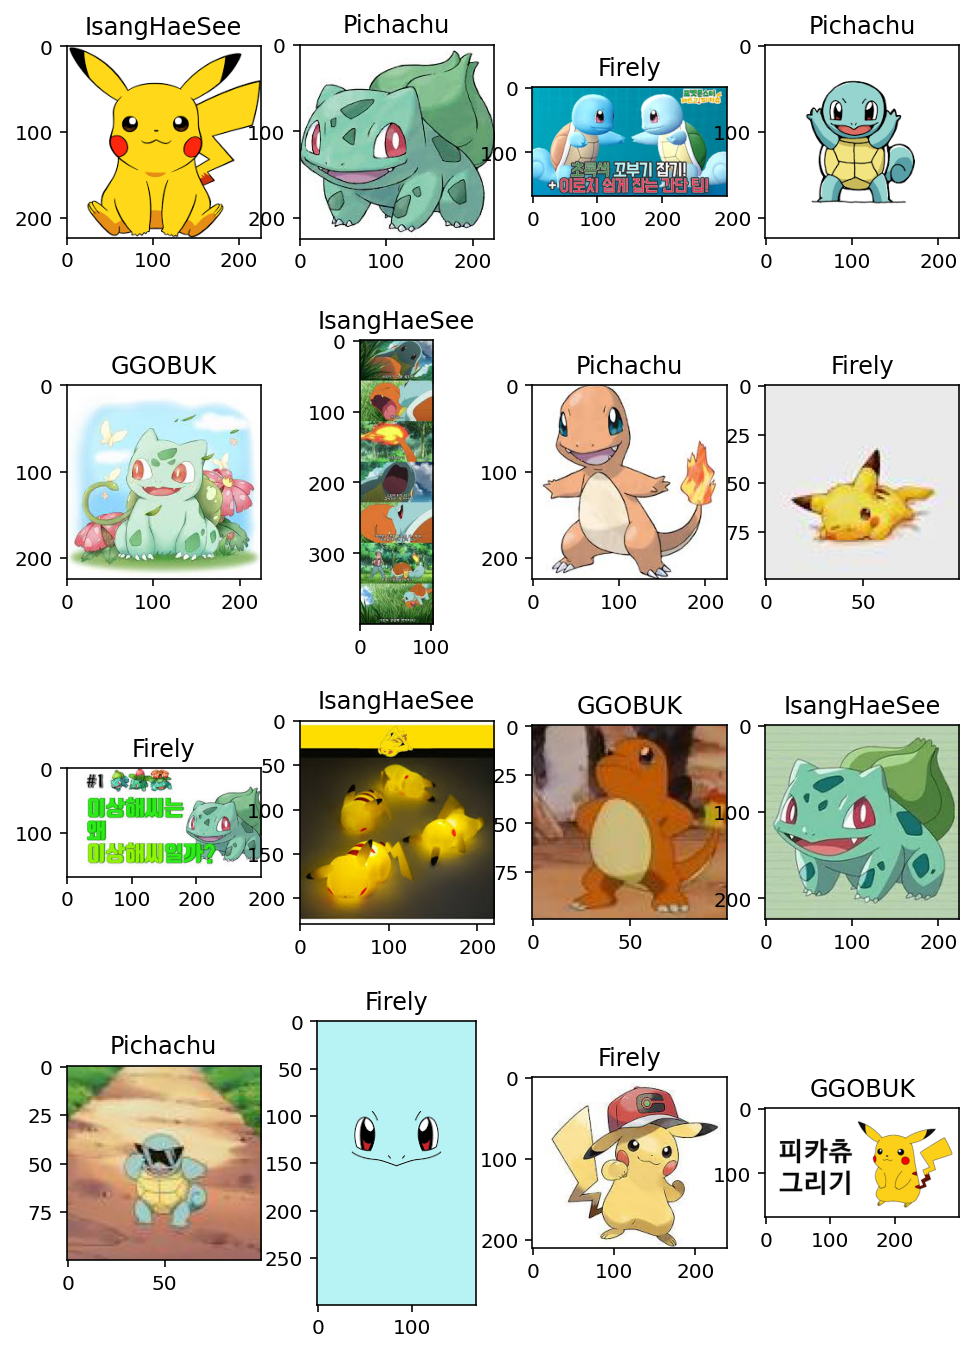

In [137]:
fig,axes =plt.subplots(4,4, figsize=(8,12l))
i=0
for path, name in zip(test_generator.filenames, names):
    axes[i//4][i%4].imshow(Image.open(path))
    axes[i//4][i%4].set_title(f'{quote_plus(name)}')
    i+=1
    if i==16:
        break
plt.show()